In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import mahalanobis
%matplotlib inline

# Causal Inference 

> Correlation is not equal to causation

You may have seen this phrase before. It usually refers to the fact that just because we observe trends in data does not necessarily mean that one variable in the data *causes* changes in the other. There are many humorous examples of this, and the following provides many such examples:

https://www.tylervigen.com/spurious-correlations

However, we are often interested in answering causal questions, especially when it comes to health. Does smoking cause cancer? Does exercise decrease the risk of heart disease? Questions such as these all require causal analysis to answer. 

Causal inference is the branch of statistics which deals with these questions. The gold standard tool of causal inference is *randomization*, which is typically employed in randomized control trials (RCTs). In RCTs, subjects are randomized into 2 groups, one which receives an intervention and one which does not. Then, whatever effect is observed can be attributed to the intervention. 

However, what happens if we do not have a randomized control trial? How can we still make inferences about causal effects? We will look at this question in detail.

### Example 

Let's say we have built a model which identifies patients who are likely to benefit from palliative care. Whenever such a patient is identified in the hospital, the doctor is notified by email that their patient may benefit. We want to know whether this notification has a causal effect on certain outcomes, such as the percentage of patients who recieve palliative care services.  

Although this seems like a location where a randomized control trial would be perfect, randomized control trials are 

    1. Expensive
    2. Time-consuming
    3. Ethically complicated
    


If we can somehow mimic the results of a randomized control trial, while using observational data, that would be a good start towards showing that this intervention had a real effect. 

## Rubin Causal Model 

Donald Rubin, in his seminal papers in '74 and '78, defined a new framework for doing causal inference. There is also work done by Judea Pearl, which is another popular framework, but which we will not discuss in this class. In his model, Rubin relies on a concept known as the *Potential Outcome*.

#### Potential Outcome

A **potential outcome** is the value of a unit's measurement of interest after treatment or non-treatment. However, the fundamental problem in causal inference is that we can only observe one of these measurements! Either we get the value after treatment or if a unit does not receive the treatment. So essentially this boils down to a missing data problem 

## Assumptions of RCM

Before we can just go ahead and compute the causal effect of some intervention, we have to make sure that we meet certain assumptions. These are very important in the RCM since if any of these are violated, the entire analysis could be invalid. The most important assumption is the SUTVA assumption, which stands for Stable Unit Treatment Value Assumption. 

## SUTVA 

This assumption states that the potential outcomes for any unit do not vary with the treatments assigned to any other units AND that there are no different versions of the treatment. 

In some studies, it is very easy to violate these assumptions. For example, if you are studying the effect of some contagious disease, it is clear that the the potential outcome for one unit could vary with another since it may make them more/less likely to spread the disease. There is still ongoing research to determine whether other assumptions are required if SUTVA is violated.

In addition, if we are working with observational data, we need a few more assumptions. In particular, we do not control or know the assignment mechanism. That is, we have no idea why certain units received the treatment and others did not. In order to account for this, we need the following properties to hold:

**Unconfoundedness**
        - The probability of receiving the treatment, after knowing the values of covariates, is independent of the potential outcomes

$$ Pr(\textbf{W}|\textbf{Y}(0), \textbf{Y}(1), \textbf{X}) = Pr(\textbf{W}|\textbf{X})$$

Where $\textbf{W}$ is the treatment vector, $\textbf{Y}(0), \textbf{Y}(1)$ are potential outcomes, and $\textbf{X}$ are the covariates

This means that whether you are in the treatment group can be determined by your covariates. If this were not the case, and it depended on the potential outcome, then we have no way of splitting up the two groups since we only observe at most 1 potential outcome! Therefore, there is missing information that is affecting our treatment assignment. 

**Probabilistic Overlap** The probability of receiving the treatment is between 0 and 1 for every unit. 

$$0 < Pr(W_i = 1|X_i) < 1$$

Together, these two assumptions make up the **strong ignorability** assumption 

## Why Randomization?

Why is randomization an important tool in causal inference? Formally, randomization, on average, *balances covariates*. This means that the distribution of covariates in the treatment group and the intervention group are similar. When we randomize, we are essentially drawing from the total population in both the treatment and intervention groups, so it makes sense that these would be balanced. If we could, we would randomize every experiment and not have to deal with many of the assumptions stated above. However, our goal with the following methods is to *mimic* randomization. The key here is that we need balanced covariates in both groups, since this is the primary aim of randomization. 

The assumptions above allow us to use methods that mimic randomization and create a *psuedo-population* which has balanced covariates."

## Balancing Covariates 

If we have strong ignorability, we can do valid causal inference if we compare the difference in Y between the treatment group and control group provided that the covariates are balanced. So how exactly do we balance these covariates? When we have a small number of covariates, we can take a matching or stratification approach.

In an extreme case (where this is possible), we can use *exact matching*. That is, for every unit in the treatment group, find a control group member with the exact same covariates. If we do this, then we force the covariates to be balanced (actually identical). Obviously this is not possible in most cases and represents an ideal case. 

## Example 

Let's go back to our example of palliative care notifications. We're going to look at an abbreviated form of the data to see if we can see whether the covariates are balanced or not.

In [2]:
notification_df = pd.read_csv("./assets/causal_inf_extract.csv")

In [3]:
notification_df.head()

,age,notification,admission_type_label_Urgent Admission,admission_type_label_Routine Elective Admission,admission_type_label_Emergency Admission,acp_note_filed,full_propensity_score,hospice_disch,code_status
0,89.970830,False,0,0,1,0,0.027484,0,0
1,44.739224,False,0,0,1,0,0.002748,0,0
2,85.626297,False,0,0,1,0,0.021631,0,0
3,34.889035,False,1,0,0,0,0.001617,0,0
4,62.575249,False,0,0,1,0,0.006805,0,0


Here we have 2 groups: those that did not receive the notification (False) and those that did (True). We also have a few covariates (though there were many others used in this analysis). We will look at the distributions of these now:

Text(0.5, 1.0, 'Distribution of Age across groups')

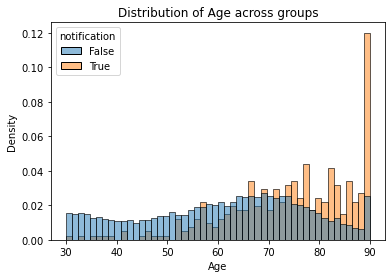

In [4]:
sns.histplot(data = notification_df, x='age', hue='notification', stat='density', bins=50, common_norm=False)
plt.xlabel("Age")
plt.title("Distribution of Age across groups")

In [5]:
pd.crosstab(notification_df['notification'], notification_df['admission_type_label_Urgent Admission'])

admission_type_label_Urgent Admission,0,1
notification,,
False,34463,4127
True,335,5


In [6]:
print(5/340)
print(4127/(4127+34463))

0.014705882352941176
0.10694480435345945


In [7]:
pd.crosstab(notification_df['notification'], notification_df['admission_type_label_Routine Elective Admission'])

admission_type_label_Routine Elective Admission,0,1
notification,,
False,27900,10690
True,340,0


In [8]:
pd.crosstab(notification_df['notification'], notification_df['admission_type_label_Emergency Admission'])

admission_type_label_Emergency Admission,0,1
notification,,
False,14827,23763
True,5,335


## Nearest-Neighbor Matching 

Let's say we want to find the effect of the notifications on the `acp_note_filed` column. If we observe the empirical difference without balancing covariates, we see the following relationship:

In [9]:
pd.crosstab(notification_df['notification'], notification_df['acp_note_filed'])

acp_note_filed,0,1
notification,,
False,37685,905
True,230,110


clearly, this is a pretty large distance. However, as we have seen, it isn't enough to simply do this type of analysis, since we are not controlling for the covariates. We will continue with a nearest neighbor matching algorithm.

First, we need to define a distance metric so that we can compute the distance between data points. We will use the Mahalanobic distance in order to do this:

#### Mahalanobis Distance (1936)
$$d(\textbf{x}, \textbf{y}) = \sqrt{(\textbf{x} - \textbf{y})^TS^{-1}(\textbf{x} - \textbf{y})}$$

where $\textbf{x}$ and $\textbf{y}$ are two vectors from the same distribution and S is the covariance matrix. This allows for a generalized euclidean distance in high dimensions. Let's write a function to calculate this!


In [12]:
S = np.cov(notification_df.loc[:, [
                                    'age', 
                                    'admission_type_label_Urgent Admission',
                                    'admission_type_label_Routine Elective Admission',
                                    'admission_type_label_Emergency Admission'
                                    ]].values.T)


In [19]:
def mahalanobis_distance(x, y, S):
    """Computes the mahalanobis distance between 2 vectors
    
    Arguments:
    ----------
    x : np.ndarray
        a vector to be compared to y
    y : np.ndarray
        a vector from the same distribution as x
    S : np.ndarray
        The covariance matrix for the data
    
    Returns
    -------
    d : np.float32
        The distance between x and y
    """
    left_term = (x - y).T
    inv_cov = np.linalg.inv(S)
    right_term = (x - y)
    left_term = np.dot(left_term, inv_cov)
    d = np.sqrt(np.dot(left_term, right_term))
    return d

### Find close matches 

For each treatment unit, we want to find the *k* closest neighbors in the negative_df and take their average status for `acp_note_filed`

In [14]:
positive_df = notification_df.loc[notification_df['notification'] == True, [
                                    'age', 
                                    'admission_type_label_Urgent Admission',
                                    'admission_type_label_Routine Elective Admission',
                                    'admission_type_label_Emergency Admission']]

negative_df = notification_df.loc[notification_df['notification'] == False, [
                                    'age', 
                                    'admission_type_label_Urgent Admission',
                                    'admission_type_label_Routine Elective Admission',
                                    'admission_type_label_Emergency Admission']]

In [15]:
positive_df.head()

,age,admission_type_label_Urgent Admission,admission_type_label_Routine Elective Admission,admission_type_label_Emergency Admission
123,68.421009,0,0,1
155,90.000000,0,0,1
324,85.841882,0,0,1
422,88.688461,0,0,1
454,52.693416,0,0,1


In [17]:
negative_df.head()

,age,admission_type_label_Urgent Admission,admission_type_label_Routine Elective Admission,admission_type_label_Emergency Admission
0,89.970830,0,0,1
1,44.739224,0,0,1
2,85.626297,0,0,1
3,34.889035,1,0,0
4,62.575249,0,0,1


In [26]:
match_dict = {}
for ind in positive_df.index:
    temp_index = negative_df.apply(mahalanobis, 
                      v = positive_df.loc[ind, :].values, 
                      VI=np.linalg.inv(S), 
                      axis=1).sort_values().index[0:3]
    match_dict[ind] = list(temp_index)

In [27]:
match_dict

{123: [37604, 17526, 6186],
 155: [4458, 2083, 10455],
 324: [28553, 9796, 17226],
 422: [4621, 14782, 12067],
 454: [36694, 24349, 30373],
 691: [2002, 26610, 18008],
 1025: [6131, 27658, 22471],
 1033: [32675, 8207, 29897],
 1230: [20845, 2057, 12024],
 1358: [21600, 30516, 21310],
 1394: [12627, 22557, 9412],
 1456: [35083, 31752, 19796],
 1777: [37118, 13228, 13151],
 1798: [4812, 6315, 11566],
 1978: [14476, 35538, 6209],
 1997: [4458, 2083, 10455],
 2031: [21303, 1332, 6262],
 2073: [21892, 8215, 24399],
 2085: [4458, 2083, 10455],
 2090: [4458, 2083, 10455],
 2589: [31583, 1994, 29649],
 2641: [4352, 3351, 26076],
 2677: [25888, 18994, 6299],
 2687: [24805, 22429, 25390],
 2728: [4458, 2083, 10455],
 2759: [31725, 21009, 11485],
 2939: [31273, 26378, 34374],
 2958: [18895, 13473, 16347],
 2965: [794, 33196, 9228],
 3064: [37649, 31577, 32962],
 3092: [9093, 2324, 713],
 3164: [5294, 4159, 5165],
 3175: [28160, 4457, 38073],
 3432: [5244, 7209, 31314],
 3455: [10354, 26717, 12658

In [28]:
def get_average_outcome(notification_df, indices):
    """Get average outcome given a set of indices
    
    """
    return np.mean(notification_df.loc[indices, 'acp_note_filed'].values)

In [30]:
### Create a new dictionary where the keys are the index of positive df
### and the values are returned by get_average_outcome
potential_outcome_dict = {k: get_average_outcome(notification_df, v) for (k,v) in match_dict.items()}

In [35]:
potential_outcome_dict

{123: 0.0,
 155: 0.3333333333333333,
 324: 0.0,
 422: 0.0,
 454: 0.0,
 691: 0.0,
 1025: 0.0,
 1033: 0.0,
 1230: 0.0,
 1358: 0.0,
 1394: 0.0,
 1456: 0.0,
 1777: 0.0,
 1798: 0.0,
 1978: 0.0,
 1997: 0.3333333333333333,
 2031: 0.0,
 2073: 0.0,
 2085: 0.3333333333333333,
 2090: 0.3333333333333333,
 2589: 0.0,
 2641: 0.0,
 2677: 0.0,
 2687: 0.0,
 2728: 0.3333333333333333,
 2759: 0.0,
 2939: 0.0,
 2958: 0.0,
 2965: 0.0,
 3064: 0.0,
 3092: 0.0,
 3164: 0.0,
 3175: 0.0,
 3432: 0.0,
 3455: 0.0,
 3475: 0.0,
 3490: 0.3333333333333333,
 3615: 0.0,
 3694: 0.0,
 3742: 0.3333333333333333,
 3939: 0.0,
 4069: 0.3333333333333333,
 4074: 0.0,
 4303: 0.0,
 4718: 0.0,
 4898: 0.0,
 4899: 0.0,
 4924: 0.0,
 5123: 0.0,
 5343: 0.0,
 5804: 0.0,
 5824: 0.0,
 5928: 0.3333333333333333,
 5986: 0.0,
 6044: 0.0,
 6058: 0.0,
 6076: 0.3333333333333333,
 6085: 0.0,
 6214: 0.0,
 6497: 0.3333333333333333,
 6559: 0.3333333333333333,
 6562: 0.0,
 6749: 0.0,
 6775: 0.0,
 6851: 0.0,
 6920: 0.0,
 6939: 0.0,
 6953: 0.3333333333333

In [38]:
po_df = pd.DataFrame(pd.Series(potential_outcome_dict))
po_df.columns = ['potential_outcome']

In [39]:
po_df

,potential_outcome
123,0.000000
155,0.333333
324,0.000000
422,0.000000
454,0.000000
...,...
38328,0.000000
38387,0.000000
38823,0.000000
38871,0.333333


In [40]:
notification_df.head()

,age,notification,admission_type_label_Urgent Admission,admission_type_label_Routine Elective Admission,admission_type_label_Emergency Admission,acp_note_filed,full_propensity_score,hospice_disch,code_status
0,89.970830,False,0,0,1,0,0.027484,0,0
1,44.739224,False,0,0,1,0,0.002748,0,0
2,85.626297,False,0,0,1,0,0.021631,0,0
3,34.889035,False,1,0,0,0,0.001617,0,0
4,62.575249,False,0,0,1,0,0.006805,0,0


In [41]:
notification_df = pd.merge(notification_df, po_df, how='left', left_index=True, right_index=True)

## Estimate the potential outcome 

In [44]:
notification_df.loc[notification_df['notification'] == True, :]

,age,notification,admission_type_label_Urgent Admission,admission_type_label_Routine Elective Admission,admission_type_label_Emergency Admission,acp_note_filed,full_propensity_score,hospice_disch,code_status,potential_outcome
123,68.421009,True,0,0,1,1,0.009098,1,1,0.000000
155,90.000000,True,0,0,1,1,0.031306,0,0,0.333333
324,85.841882,True,0,0,1,0,0.022095,0,0,0.000000
422,88.688461,True,0,0,1,0,0.025596,0,0,0.000000
454,52.693416,True,0,0,1,0,0.004226,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
38328,37.554354,True,0,0,1,1,0.001889,0,0,0.000000
38387,89.192922,True,0,0,1,1,0.026649,1,0,0.000000
38823,68.451561,True,0,0,1,0,0.009496,0,0,0.000000
38871,44.611841,True,0,0,1,0,0.002689,0,1,0.333333


In [48]:
average_treatment_effect = (notification_df.loc[notification_df['notification'] == True, 'acp_note_filed'] 
                            - notification_df.loc[notification_df['notification'] == True, 'potential_outcome'])

In [50]:
np.mean(average_treatment_effect)

0.25490196078431365

The potential outcome is now the average of the nearest neighbors. We can then assess the causal effect as the average difference between units' potential outcomes under treatment versus controlled!